In [5]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=05aa34bce9e69f0edfcac59bad050ac569db6539936fdeddfe61030a387d1fb1
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
import os
import re
from pathlib import Path
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.exceptions import ConvergenceWarning

import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import random
import wget
random.seed()
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [0]:
filename = wget.download("https://github.com/MIE451-1513-2019/course-datasets/raw/master/20_newsgroups.zip", "20_newsgroups.zip")
!unzip 20_newsgroups.zip
DATA_DIR = "20_newsgroups"

## Functions from lab

In [0]:
def clean_file_text(text):
    new_text = re.sub("Newsgroups:.*?\n", "", text)
    new_text = re.sub("Xref:.*?\n", "", new_text)
    new_text = re.sub("Path:.*?\n", "", new_text)
    new_text = re.sub("Date:.*?\n", "", new_text)
    new_text = re.sub("Followup-To:.*?\n", "", new_text)
    #re.sub Replace with regular expression
    return new_text

In [0]:
def corpus_count_words(file_list):
    tokenizer = RegexpTokenizer(r'\w+')
    word_counter = Counter()
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            word_counter.update(file_words)
    return word_counter

In [0]:
def get_topic_name(file_path):
    return file_path.parent.name

def get_target(topic_name):
    topics = ['talk.politics.mideast', 'rec.autos', 'comp.sys.mac.hardware', 'alt.atheism', 'rec.sport.baseball', 
     'comp.os.ms-windows.misc', 'rec.sport.hockey', 'sci.crypt', 'sci.med', 'talk.politics.misc', 
     'rec.motorcycles', 'comp.windows.x', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.electronics',
     'talk.politics.guns', 'sci.space', 'soc.religion.christian', 'misc.forsale', 'talk.religion.misc']
    return topics.index(topic_name)

In [0]:
def plot_confusion_matrix(cm):
    # plot the confusion matrix
    plt.figure(figsize=(10,10))
    plt.matshow(cm, fignum=1)
    
    # add labels for all targets
    num_targets = cm.shape[0]
    plt.xticks(list(range(num_targets+1)))
    plt.yticks(list(range(num_targets+1)))

## Q1

In [0]:
all_files = [pth for pth in Path(DATA_DIR).glob("**/*") if pth.is_file() and not pth.name.startswith(".")]

In [0]:
def binary_baseline_data(file_list, num_words = 1000):
    # Calculate word count in corpus
    news_cnt = corpus_count_words(file_list)
    
    # Select the most common numWords
    word_list = [word for (word, freq) in news_cnt.most_common(num_words)]
    
    # Create a binary encoding of dataset based on the selected features (X)
    tokenizer = RegexpTokenizer(r'\w+')
    df_rows = []
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            df_rows.append([1 if word in file_words else 0 for word in word_list])      
    X = pd.DataFrame(df_rows, columns = word_list)
    
    # Create a dataframe of targets (y)
    y = [get_target(get_topic_name(file_path)) for file_path in file_list]
    
    return X, y

In [14]:
# get the baseline data ## get the most common words, the top 1000
X, y = binary_baseline_data(all_files)

# split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train a logistic regression classifier
clf = LogisticRegression(C=1.0).fit(X_train, y_train)

# predict on train and test set
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

# calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)

# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

Train accuracy: 0.9486318496820747
Test accuracy: 0.6803333333333333


In [0]:

# #X_train.size  #13997000
# len(y_train) #13997
# len(y) # 19997
# len(y_test)

### Q1 (a)
In this question, we have 1000 feature, because we set number of word to be 1000 in function binary_baseline_data. We select the most common 1000 frequency word appeared in this document as features.

The train data is a 13997 x 1000 matrix. the amount of train data is 13997, also 70 percent of whole data and test data has 6000, 30 percent. 

 
We set the inverse regularization parameter (inverse of regularization strength factor) (C) to be 1 here. The higher values of C is correspond to less regularization, which is easy to be overfit. 
The lower values of C is easy to be underfit. We use L2 regularization here as default.  C is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting.

### Q1 (b)

Modify the following function:

In [16]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
def clean_file_text_improved(text):
    stop_words = set(stopwords.words('english')) 
    stopwords_dict = Counter(stop_words)
     
    new_text = re.sub("Newsgroups:.*?\n", "", text)
    new_text = re.sub("Xref:.*?\n", "", new_text)
    new_text = re.sub("Path:.*?\n", "", new_text)
    new_text = re.sub("Date:.*?\n", "", new_text)
    new_text = re.sub("Followup-To:.*?\n", "", new_text)

    new_text=new_text.lower()
    new_text = ' '.join([word for word in new_text.split() if word not in stopwords_dict])

    # new_text=nltk.wordnet.WordNetLemmatizer().lemmatize(new_text) 
    # new_text=nltk.stem.LancasterStemmer().stem(new_text)
   
    new_text = nltk.wordnet.WordNetLemmatizer().lemmatize(new_text)
    new_text = nltk.stem.lancaster.LancasterStemmer().stem(new_text)
    
    return new_text


In [0]:
 def corpus_count_words_improved(file_list):
    tokenizer = RegexpTokenizer(r'\w+')
    word_counter = Counter()
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text_improved(file_data)
            file_words = tokenizer.tokenize(file_data)
            #file_words =[word for word in tokens if word not in stop_words if len(word)>1 if word.isalpha()]
            #whether a character is an alphabet
            word_counter.update(file_words)
    return word_counter



In [0]:
def binary_improved_data(file_list, num_words = 1000):
    # Put your code here
    # Make sure you update the variable features and targets below
    tokenizer = RegexpTokenizer(r'\w+')
    word_counter = corpus_count_words_improved(file_list)
    word_list = [word for (word, freq) in word_counter.most_common(num_words)]
    df_rows = []
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text_improved(file_data)
            file_words = tokenizer.tokenize(file_data)
            df_rows.append([1 if word in file_words else 0 for word in word_list])      
    X = pd.DataFrame(df_rows, columns = word_list)
    
    # Create a dataframe of targets (y)
    y = [get_target(get_topic_name(file_path)) for file_path in file_list]
    
    # validate return types
    assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"
    
    return X, y

### Q1 (c)

Modify the following partial code to calculate the train and test accuracy and answer the question in the markdown cell below

In [20]:
# get the baseline data
X, y = binary_improved_data(all_files)

# Write your code here:
# You need to split the data and train a logistic regression classifier.
# Then, you need to calculate the variables train_accuracy and test_accuracy for the new classifier
# split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # train a logistic regression classifier
clf = LogisticRegression(C=1.0).fit(X_train, y_train)

# # predict on train and test set
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

# # calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)


# # report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

Train accuracy: 0.9562763449310566
Test accuracy: 0.7236666666666667


[Write your answer here]

the result here is actually improved. Train accuracy improved from 0.9486 to 0.9562 and test accuracy increased from 0.6803 to 0.7236

### Q1 (d)

Modify the partial code below

In [0]:
def random_mean_ci(X, y, num_tests):
    # train_results is a list of train accuracy results for the differrent random splits of the dataset
    train_results = []
    
    # test_results is a list of test accuracy results for the differrent random splits of the dataset
    test_results = []
    
    # Write your code here
    for i in range(num_tests):
      random_state = random.randint(1, 1000)
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
      # # train a logistic regression classifier
      clf = LogisticRegression(C=1.0).fit(X_train, y_train)
      # # predict on train and test set
      y_train_predict = clf.predict(X_train)
      y_test_predict = clf.predict(X_test)
      # # calculate train and test accuracy
      train_accuracy = accuracy_score(y_train, y_train_predict)
      test_accuracy = accuracy_score(y_test, y_test_predict)
      train_results.append(train_accuracy)
      test_results.append(test_accuracy)
  
  
    
    # calculate the train mean and the 95% confidence interval for the list of results
    train_mean = np.mean(train_results)
    train_ci_low, train_ci_high = stats.t.interval(0.95, len(train_results)-1, loc=train_mean, scale=stats.sem(train_results))
    
    # calculate the test mean and the 95% confidence interval for the list of results
    test_mean = np.mean(test_results)
    test_ci_low, test_ci_high = stats.t.interval(0.95, len(test_results)-1, loc=test_mean, scale=stats.sem(test_results))
    
    # validate return types
    assert isinstance(train_mean, float) and isinstance(train_ci_low, float) and isinstance(train_ci_high, float), "return types"
    assert isinstance(test_mean, float) and isinstance(test_ci_low, float) and isinstance(test_ci_high, float), "return types"
    
    return train_mean, train_ci_low, train_ci_high, test_mean, test_ci_low, test_ci_high

### Q1 (e)

Use the following code to calculate the mean accuracy and 95% confidence interval over 10 random splits

In [22]:
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci(X, y, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.9581481746088446
Train confidence interval over 10 random splits: [0.9571869479550605, 0.9591094012626287]
Test mean accuracy over 10 random splits: 0.71505
Test confidence interval over 10 random splits: [0.7120505676473075, 0.7180494323526925]


[ Write your answer here ]
What do the average and 95% confidence intervals tell you? Are they more informative than a single trial? Yes or no, and why? [2 sentences.]

1.   The 95% confidence interval means that we can be 95% certain that contains the true mean of the accuracy(train, test). 
2.   Yes! 
The results of 10 iterations are more informative than a single trial because the training and testing data are separated for multiple times and thus to eliminate bias. They tell us, the mean value of training accuracy are 95% in the interval between 0.957-0.959 and testing accuracy are 95% in the interval of 0.712 and 0.718.

### Q1 (f)

Modify the partial code below

In [0]:


def random_cm(X, y, num_tests):
    # cm_list is a list of confusion matrices for the different random splits of the dataset
    cm_list = []
    for i in range(num_tests):
      random_state = random.randint(1, 1000)
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
      clf = LogisticRegression(C=1.0).fit(X_train, y_train)
      y_test_predict = clf.predict(X_test)
      cm = confusion_matrix(y_test, y_test_predict)
      cm_list.append(cm)

    # sum the confusion matrices and return the combined confusion matrix
    # combined_cm = pd.Panel(cm_list).sum(axis=0)

    combined_cm=pd.DataFrame(np.array(cm_list).sum(axis=0))
    
    # validate return type
    assert isinstance(combined_cm, pd.DataFrame), "return type"
    
    return combined_cm


### Q1 (g)

Use the following code to produce a confusion matrix for 10 random splits

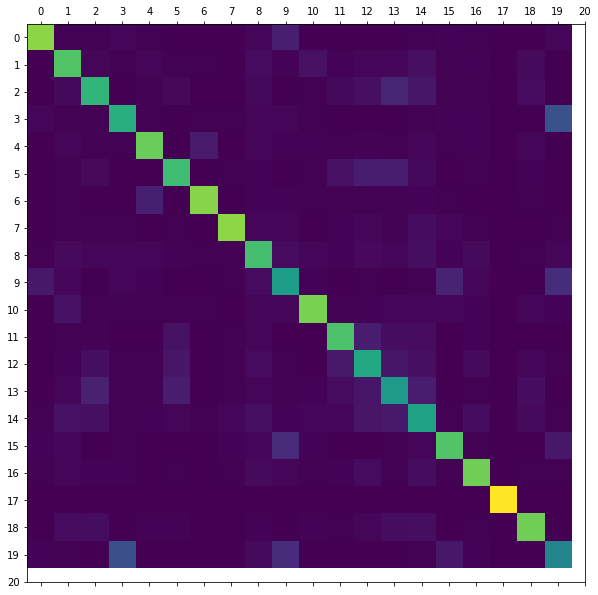

In [24]:

cm10 = random_cm(X, y, num_tests = 10)
plot_confusion_matrix(cm10)

In [0]:
topics = ['talk.politics.mideast', 'rec.autos', 'comp.sys.mac.hardware', 'alt.atheism', 'rec.sport.baseball', 
     'comp.os.ms-windows.misc', 'rec.sport.hockey', 'sci.crypt', 'sci.med', 'talk.politics.misc', 
     'rec.motorcycles', 'comp.windows.x', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.electronics',
     'talk.politics.guns', 'sci.space', 'soc.religion.christian', 'misc.forsale', 'talk.religion.misc']

In [40]:
print(topics[9],topics[15])
print(topics[11],topics[10])
print(topics[19],topics[3])

talk.politics.misc talk.politics.guns
comp.windows.x rec.motorcycles
talk.religion.misc alt.atheism


[ Write your answer here ]

The class 19 is easy confused with class 3 as atheism is kind a religion topic. As for topic 9 and topic 15, they all talk about politics, easy to get confused. 

## Q2

### Q2 (a)

Modify the partial code below

In [0]:
def feature_num(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for p in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
        subset_size = int(p*X.shape[1])
        X_train_subset = X_train.iloc[:, 0:subset_size]
        X_test_subset = X_test.iloc[:, 0:subset_size]
        # Write your code here to calculate train_accuracy and test_accuracy for the current subset of features
        # ......
        
        
        
        # # train a logistic regression classifier
        clf = LogisticRegression(C=1.0).fit(X_train_subset, y_train)
        # # predict on train and test set
        y_train_predict = clf.predict(X_train_subset)
        y_test_predict = clf.predict(X_test_subset)
        # # calculate train and test accuracy
        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)


        # add to result_list
        result_list.append((p, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["num_features", "train_accuracy", "test_accuracy"])
    
    # validate return type
    assert isinstance(result_df, pd.DataFrame), "return type"
    
    return result_df

### Q2 (b)

Use the following code to plot the train and test accuracy for the different feature sets sizes

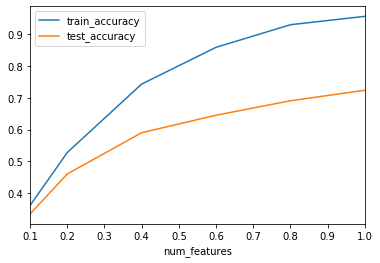

In [26]:
feature_num_df = feature_num(X, y)
feature_num_df.plot(x="num_features", y=["train_accuracy", "test_accuracy"])

With more number of features, we have higher accuracy for both train and test set. The increasing rate is decreased when features increase. Furthermore, the accuracy decreasing rate for test set is faster than accuracy of train set.

## Q3

### Q3 (a)

Modify the partial code below

In [0]:
def hyperparameter(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for param in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
        # Write your code here to calculate train_accuracy and test_accuracy for the current parameter value
    
        
        # # train a logistic regression classifier
        clf = LogisticRegression(C=param).fit(X_train, y_train)
        # # predict on train and test set
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)
        # # calculate train and test accuracy
        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)



        
        # add to result_list
        result_list.append((param, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["param", "train_accuracy", "test_accuracy"])
    
    # validate return type
    assert isinstance(result_df, pd.DataFrame), "return type"
    
    return result_df

### Q3 (b)

Use the following code to plot the train and test accuracy for the different the parameters

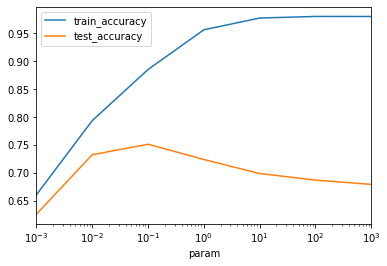

In [28]:
param_df = hyperparameter(X, y)
param_df.plot(x="param", y=["train_accuracy", "test_accuracy"], logx=True)

[ Write your answer here ]

The accuracy of train set increases as the hyperparameter C increses. After the pick value c=0.1, the the accuracy of test set shows downward trend. The hyperparameter C means to avoid overfitting; at the beginning, c starts from 0 to peak point, we have underfitting issue.
When C>0.1, we have leaded overfitting issue.


## Q4

### Q4 (a)

Modify the partial code below

In [0]:
def tf_improved_data(file_list, num_words = 1000):
    # Put your code here
    # Make sure you update the variable features and targets below

    tokenizer = RegexpTokenizer(r'\w+')
    word_counter = corpus_count_words_improved(file_list)
    word_list = [word for (word, freq) in word_counter.most_common(num_words)]
   
    df_rows = [] 
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text_improved(file_data)
            file_words = tokenizer.tokenize(file_data)
            df_rows.append([file_words.count(word)  if word in file_words else 0 for word in word_list])      
    X = pd.DataFrame(df_rows, columns = word_list)
    
    # Create a dataframe of targets (y)
    y = [get_target(get_topic_name(file_path)) for file_path in file_list]
    
    # validate return types
    assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"
    
    
    # validate return types
    assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"
    
    return X, y



### Q4 (b)

Use the following code to calculate the mean accuracy and 95% confidence interval over multiple random splits

In [30]:
X_tf, y_tf = tf_improved_data(all_files)
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci(X_tf, y_tf, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.9323497892405517
Train confidence interval over 10 random splits: [0.9273087315774795, 0.9373908469036238]
Test mean accuracy over 10 random splits: 0.7137166666666668
Test confidence interval over 10 random splits: [0.7105823061171814, 0.7168510272161521]


[ Write your answer here ]
Binary encoding has better accuracy 0.7236 than term frequency accuracy 0.7137 .The reason I think is that some words with high frequency might have little meaning and some rare words are actually more informative. 


## Q5

### Q5 (a)

Modify the partial code below

In [0]:
def nb_random_mean_ci(X, y, num_tests):
    # train_results is a list of train accuracy results for the differrent random splits of the dataset
    train_results = []
    
    # test_results is a list of test accuracy results for the differrent random splits of the dataset
    test_results = []
    
    # Write your code here

   
     
    for i in range(num_tests):
        random_state = random.randint(1, 1000)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
        # # train a logistic regression classifier
        gnb =BernoulliNB().fit(X_train, y_train)
        # # predict on train and test set
        y_train_predict = gnb.predict(X_train)
        y_test_predict = gnb.predict(X_test)
        # # calculate train and test accuracy
        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)
        train_results.append(train_accuracy)
        test_results.append(test_accuracy)

    
    
    # calculate the train mean and the 95% confidence interval for the list of results
    train_mean = np.mean(train_results)
    train_ci_low, train_ci_high = stats.t.interval(0.95, len(train_results)-1, loc=train_mean, scale=stats.sem(train_results))
    
    # calculate the test mean and the 95% confidence interval for the list of results
    test_mean = np.mean(test_results)
    test_ci_low, test_ci_high = stats.t.interval(0.95, len(test_results)-1, loc=test_mean, scale=stats.sem(test_results))
    
    # validate return types
    assert isinstance(train_mean, float) and isinstance(train_ci_low, float) and isinstance(train_ci_high, float), "return types"
    assert isinstance(test_mean, float) and isinstance(test_ci_low, float) and isinstance(test_ci_high, float), "return types"
    
    return train_mean, train_ci_low, train_ci_high, test_mean, test_ci_low, test_ci_high

### Q5 (b)

Use the following code to calculate the mean accuracy and 95% confidence interval over multiple random splits

In [32]:
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = nb_random_mean_ci(X, y, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.6796027720225762
Train confidence interval over 10 random splits: [0.6770167607568953, 0.6821887832882572]
Test mean accuracy over 10 random splits: 0.6301333333333333
Test confidence interval over 10 random splits: [0.626408250090322, 0.6338584165763447]


[ Write your answer here ]
Naive Bayes performs worse than logistic regression.

This is becuase Naive Bayes model considers each of these features to contribute independently to the probability. But our data actually have internal relation to each other, which leads to a poor prediction results.

## Q6

### Q6 (a)

Modify the partial code below

In [0]:
def binary_med_data(file_list, num_words = 1000):
    # Put your code here
    # Make sure you update the variable features and targets below
    
    
    tokenizer = RegexpTokenizer(r'\w+')
    word_counter = corpus_count_words_improved(file_list)
    word_list = [word for (word, freq) in word_counter.most_common(num_words)]
    
    
    df_rows = []
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text_improved(file_data)
            file_words = tokenizer.tokenize(file_data)
            df_rows.append([1 if word in file_words else 0 for word in word_list])   
    X = pd.DataFrame(df_rows, columns = word_list)
    y = [1 if get_topic_name(file_path)=="sci.med" else 0 for file_path in file_list]
    
    
    # validate return types
    assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"
    
    return X, y

### Q6 (b)

Use the following code to calculate the mean accuracy and 95% confidence interval over multiple random splits

In [34]:
X, y = binary_med_data(all_files)
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci(X, y, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.9871043795098948
Train confidence interval over 10 random splits: [0.9866560715544818, 0.9875526874653079]
Test mean accuracy over 10 random splits: 0.9700166666666666
Test confidence interval over 10 random splits: [0.9689189656246485, 0.9711143677086848]


[ Write your answer here ]
The training and test accuracies are all pretty high. The binary logistic regression worked much better than multiclass logistic regression.